In [1]:
import sys
sys.path.append("../")
import library
import matplotlib.pyplot as plt
import numpy as np
import math

C:\Users\cdipt\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\cdipt\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Question 1: 

In [2]:
random_numbers = library.random.LGC(a=1103515245, m=32768, c=12345, no_sample=int(2e5), x0=0.1)
x = random_numbers[:int(1e5)]
y = random_numbers[int(1e5):]
coordinates = (x,y)
x = library.linalg.scale_list(x)
x = list(map(lambda s: 2*s,x))
y = library.linalg.scale_list(y)
y = list(map(lambda s: 2*s,y))

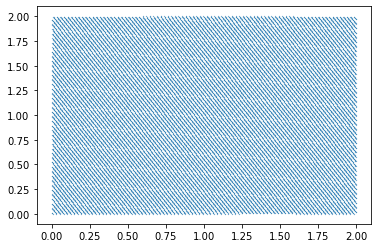

In [3]:
plt.scatter(x,y, s = 0.01)

In [4]:
def is_ellipse(a,b,x,y):
    """
    is_ellipse: The function to check if a point(x,y) is within a ellipse
    whose sem-axis are a,b
    """
    c = (x/a)**2 + (y/b)**2
    if c <= 1:
        return True
    else:
        return False

inside_ = 0
x_i =[]
y_i = []
x_o =[]
y_o = []
outside_ = 0
total = 0
for i in range(len(x)):
    total = total +1
    if is_ellipse(1,2,x[i],y[i]):
        inside_ = inside_ + 1
        x_i.append(x[i])
        y_i.append(y[i])
        
    else:
        outside_ = outside_ + 1
        x_o.append(x[i])
        y_o.append(y[i])


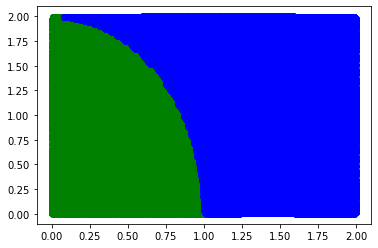

In [5]:
plt.scatter(x_i,y_i,c="green")
plt.scatter(x_o,y_o,c="blue")


### Now since we have only considered the first quadrant of the ellipse and considered it to be symmetric about both the axis the area of the total ellipse is 4 times the area found in the first quadrant

In [6]:
print("Total number of points inside",inside_)
print("Total number of points",total)
print("Area of the square with sides 2X2",4)
print("Area of the ellipse is (number of points inside*area of the square)/(total number of points)")
area = 4*(inside_/total)
print("Area of the ellipse in the first quadrant is ",area)
area = 4*area
print("Total are is 4 times this area, hence total area",area)
print("Analytical value", math.pi*2)
diff = 100*abs(math.pi*2 - area)/(math.pi*2)
print("The realative difference in percentage",diff)

Total number of points inside 39284
Total number of points 100000
Area of the square with sides 2X2 4
Area of the ellipse is (number of points inside*area of the square)/(total number of points)
Area of the ellipse in the first quadrant is  1.57136
Total are is 4 times this area, hence total area 6.28544
Analytical value 6.283185307179586
The realative difference in percentage 0.03588455075227156


## Question 2 

In [7]:
def spectrum(x):
    return (x-5)*(math.e)**x + 5
def spectrum_p(x):
    return (x-4)*(math.e)**x

In [8]:
x = library.root_finding.RootByNewtonRalphson(guess = 6,func=spectrum,func_p=spectrum_p,eps=1e-6)
h = 6.626*1e-34
k = 1.381*1e-23
c = 3*1e8
lamda_T = (h*c)/(k*x)
print("The Weins constant is",format(lamda_T,".4g"))

The Weins constant is 0.002899


## Question 3

In [9]:
matrix, vector = library.io.reader("./msem_gs_edited.txt")
vector = list(map(lambda x: [x], vector))
matrix = library.matrix.matrix(matrix)
vector = library.matrix.matrix(vector)

In [10]:
print(matrix)
print(vector)

-2.0	 0.0	 0.0	-1.0	 0.0	 0.5	
 0.0	 4.0	 0.5	 0.0	 1.0	 0.0	
 0.0	 0.5	 1.5	 0.0	 0.0	 0.0	
-1.0	 0.0	 0.0	-2.0	 0.0	 1.0	
 0.0	 1.0	 0.0	 0.0	-2.5	 0.0	
 0.5	 0.0	 0.0	 1.0	 0.0	-3.75	

-1.0	
 0.0	
 2.75	
 2.5	
-3.0	
 2.0	



In [11]:
x = library.linear.gauss_seidel(matrix,vector,G=[0,0,0,0,0,0],precision=1e-6)
print("The soultion of the equations using the gauss seidel method")
print(x)

The soultion of the equations using the gauss seidel method
 1.4999998297596435	
-0.4999999999999992	
 1.9999999999999998	
-2.499999914864037	
 1.0000000000000004	
-0.9999999999957907	



## Question 4

In [12]:
x,y = library.io.read_sequential_data("./msem_fit.txt", separator="  ")

In [13]:
def plot(a,b):
    x = []
    y = []
    for i in range(1000):
        x.append(i/10)
        y.append(x[i]*a+b)
    plt.plot(x,y)

The pearson coefficient of fit is  0.7750435352872259
The slope of the fit is  -0.53740930145056
The intercept of the fit is  3.0467272510281007
Hence b is  -0.53740930145056
Hence a is  21.04635215955


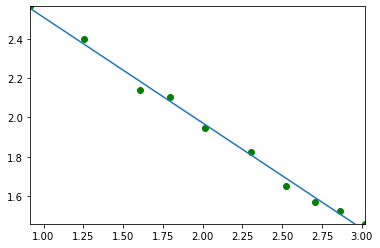

In [14]:
#Fitting with y = ax^b
log_y = list(map(lambda a: math.log(a),y))
log_x = list(map(lambda a: math.log(a),x))
fit = library.fitting.linear_fit(log_x,log_y)
plt.scatter(log_x,log_y,color="green")
plt.xlim(min(log_x),max(log_x))
plt.ylim(min(log_y),max(log_y))
plot(fit[1],fit[0])
print("The pearson coefficient of fit is ",fit[-1])
print("The slope of the fit is ",fit[1])
print("The intercept of the fit is ",fit[0])
print("Hence b is ",fit[1])
print("Hence a is ", (math.e)**fit[0])

In [15]:
#Fitting with ae^-bx

The pearson coefficient of fit is  0.5762426888065756
The slope of the fit is  -0.05845553447818332
The intercept of the fit is  2.5025003706646873
Hence b is  0.05845553447818332
Hence a is  12.212992824568268


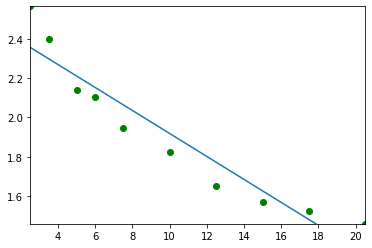

In [16]:
plt.scatter(x,log_y,color="green")
fit = library.fitting.linear_fit(x,log_y)
plt.xlim(min(x),max(x))
plt.ylim(min(log_y),max(log_y))
plot(fit[1],fit[0])
print("The pearson coefficient of fit is ",fit[-1])
print("The slope of the fit is ",fit[1])
print("The intercept of the fit is ",fit[0])
print("Hence b is ",-fit[1])
print("Hence a is ", (math.e)**fit[0])

####  For fitting with y = ax^b the pearson coefficient is 0.7750435352872259
####  For fitting with y = ax^b the pearson coefficient is 0.5762426888065756
#### Hence the fit y=ax^b is more suitable for our given data